In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *

In [3]:
from dataset import *

In [4]:
from data_module import *

In [5]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [6]:
df = pd.read_csv('dataset_strat.csv')

In [7]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[3530, 2445, 3730, 2644]]",1,0
1,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[351, 319, 546, 519]]",1,0
2,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[287, 1023, 486, 1227], [1404, 2490, 1604, 26...",3,0
3,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[272, 1018, 466, 1212], [1399, 2495, 1599, 26...",3,0
4,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[356, 389, 561, 588]]",1,0
...,...,...,...,...,...,...,...
102,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[326, 254, 526, 459], [2522, 269, 2722, 469],...",9,4
103,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[1484, 529, 1684, 723]]",1,4
104,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[336, 324, 536, 524]]",1,4
105,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[466, 469, 671, 663]]",1,4


In [8]:
df["bboxes"] = df["bboxes"].apply(eval)

In [9]:
test_dataset = BoltDataset(df, get_train_transforms(), 'test')

21


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 2048, 2048])


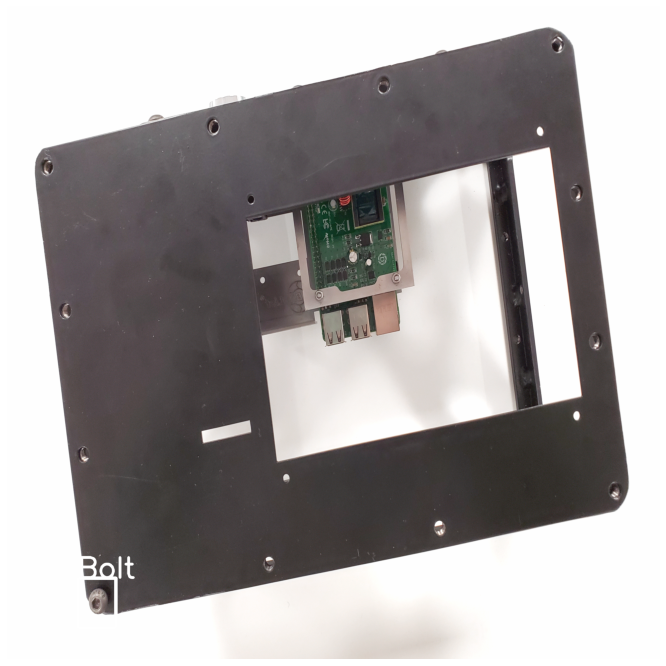

In [10]:
test_dataset.show_data(15)

In [11]:
bolt_module = BoltDataModule(df,
                             get_train_transforms(target_img_size=1024),
                             get_valid_transforms(target_img_size=1024),
                             num_workers=16,
                             batch_size=2)

65


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 1024, 1024])


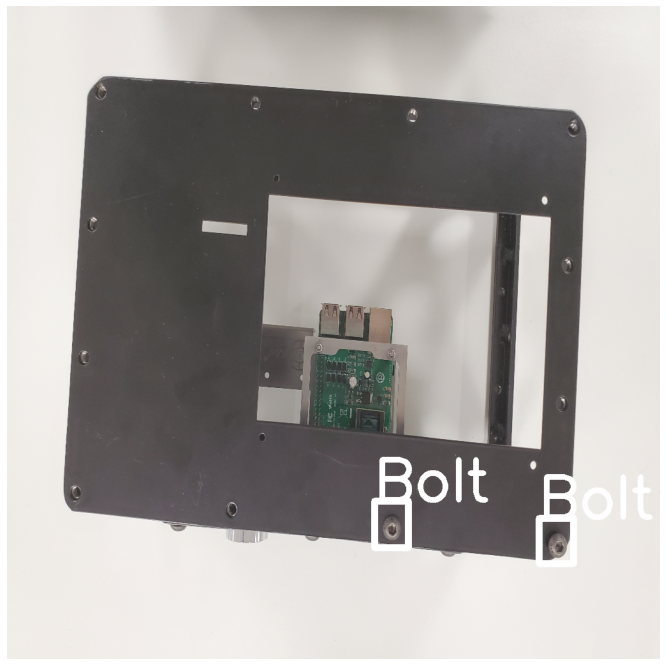

In [12]:
bolt_module.train_dataset().show_data(60)

In [13]:
loader = bolt_module.train_dataloader()

65


In [14]:
#images, targets, bolts = 
data = next(iter(loader))

In [15]:
data

[tensor([[[[1.6495, 1.6153, 1.6153,  ..., 1.7009, 1.7009, 1.7352],
           [1.6667, 1.6153, 1.6153,  ..., 1.6838, 1.7009, 1.7180],
           [1.6667, 1.6495, 1.6667,  ..., 1.7694, 1.7009, 1.7180],
           ...,
           [1.3927, 1.3413, 1.4098,  ..., 1.5982, 1.5982, 1.6153],
           [1.4269, 1.3927, 1.4269,  ..., 1.6667, 1.6667, 1.5982],
           [1.4098, 1.4269, 1.4098,  ..., 1.5468, 1.5468, 1.5982]],
 
          [[1.4307, 1.4482, 1.4482,  ..., 1.4657, 1.4132, 1.5007],
           [1.4657, 1.4132, 1.4132,  ..., 1.4657, 1.4832, 1.5007],
           [1.4132, 1.3957, 1.4132,  ..., 1.5007, 1.4832, 1.5007],
           ...,
           [1.1856, 1.0630, 1.0980,  ..., 1.3606, 1.3782, 1.3782],
           [1.1506, 1.1331, 1.2031,  ..., 1.3606, 1.3606, 1.3782],
           [1.1856, 1.1681, 1.1681,  ..., 1.3431, 1.3256, 1.3431]],
 
          [[1.6988, 1.8208, 1.8383,  ..., 1.6988, 1.6814, 1.6988],
           [1.8557, 1.6814, 1.6814,  ..., 1.6465, 1.6988, 1.7163],
           [1.8208, 1.68